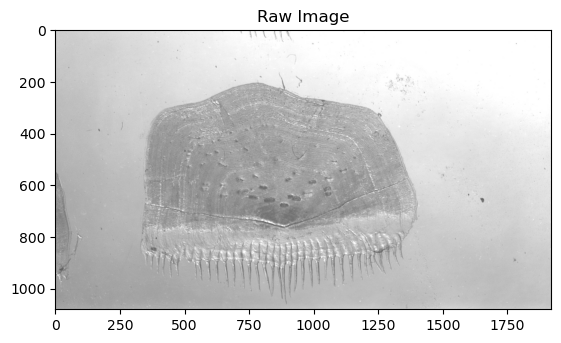

In [23]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
raw_image = cv.imread("G:/Shared drives/NMFS SEFSC FATES Advanced Technology/BIOLOGY_LIFE_HISTORY_DATA/Atlantic menhaden to be tested w active learning/subset/28771.tif")
img2 = raw_image[:,:,::-1]
plt.imshow(img2)
plt.title('Raw Image')
plt.show()

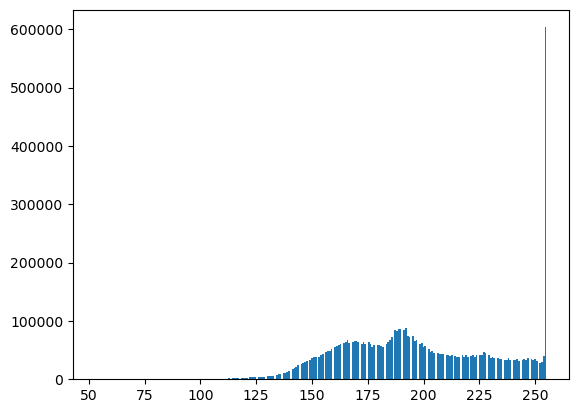

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.hist(raw_image.flatten(), 255)
plt.show()

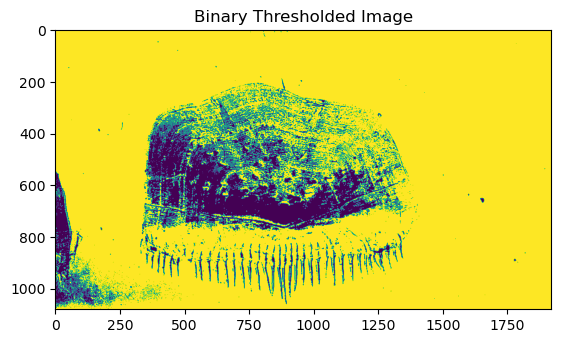

In [46]:
threshold_value = 160
gray_image = cv.cvtColor(raw_image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray_image,threshold_value,255,cv.THRESH_BINARY)
plt.imshow(thresh)
plt.title('Binary Thresholded Image')
plt.show()

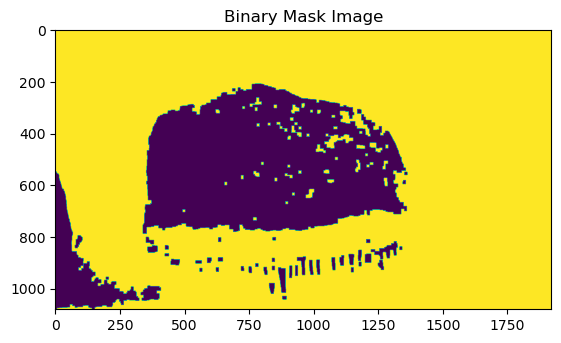

In [47]:
kernel = np.ones((10,10),np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.title('Binary Mask Image')
plt.show()

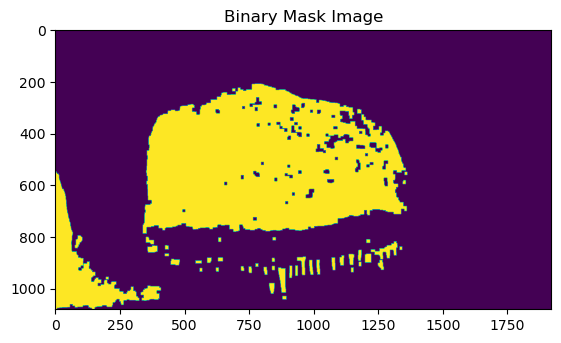

In [48]:
plt.imshow(np.invert(closing))
plt.title('Binary Mask Image')
plt.show()

In [62]:
cv.findContours?

Docstring:
findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
.   @brief Finds contours in a binary image.
.   
.   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
.   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
.   OpenCV sample directory.
.   @note Since opencv 3.2 source image is not modified by this function.
.   
.   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
.   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
.   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
.   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
.   @param contours Detected contours. Each contour is stored as a vector of points (e.g.
.   std::vector<

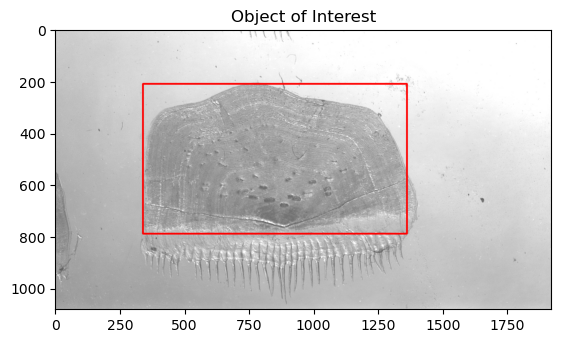

In [49]:
contours, hierarchy = cv.findContours(np.invert(closing), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
# contours, hierarchy = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
if(len(contours) > 0):
    maxidx = 0
    maxarea = 0
    for i in range(len(contours)):
        contour = contours[i]
        if cv.contourArea(contour) > maxarea:
            maxarea = cv.contourArea(contour)
            maxidx = i
    x,y,w,h = cv.boundingRect(contours[maxidx])
start = (x,y)
end = (x+w, y+h)
color = (255, 0, 0)
thickness = 5
display = raw_image.copy()
display = cv.rectangle(display, start, end, color, thickness)
plt.imshow(display)
plt.title('Object of Interest')
plt.show()

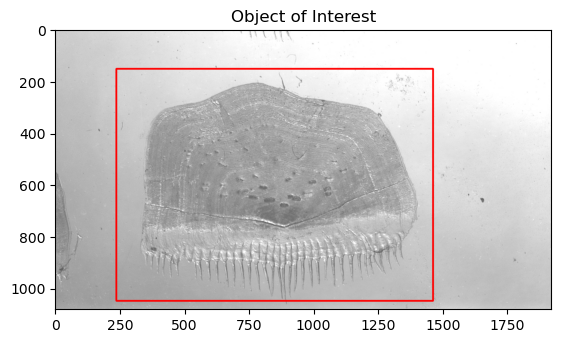

In [59]:
xmargin = 0.1
ymargin_top = 0.1
ymargin_bot = 0.45
y_max, x_max,c = raw_image.shape
x_new = int(max(0,x-w*xmargin))
y_new = int(max(0,y-h*ymargin_top))
w_new = int(min(w*(1+xmargin*2),x_max-x_new))
h_new = int(min(h*(1+ymargin_top+ymargin_bot), y_max-y_new))

start = (x_new,y_new)
end = (x_new+w_new, y_new+h_new)
color = (255, 0, 0)
thickness = 5
display = raw_image.copy()
display = cv.rectangle(display, start, end, color, thickness)
plt.imshow(display)
plt.title('Object of Interest')
plt.show()

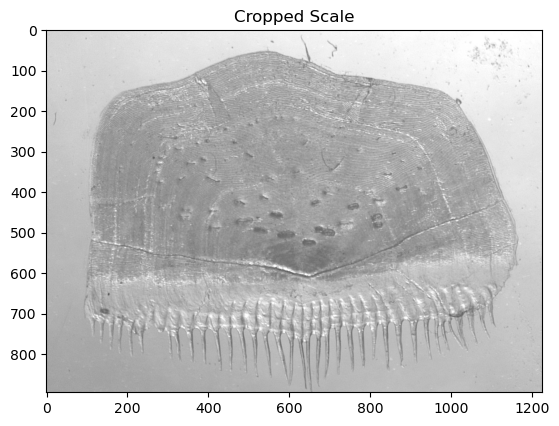

In [60]:
crop = raw_image[y_new:y_new+h_new,x_new:x_new+w_new,:]
plt.imshow(crop)
plt.title('Cropped Scale')
plt.show()

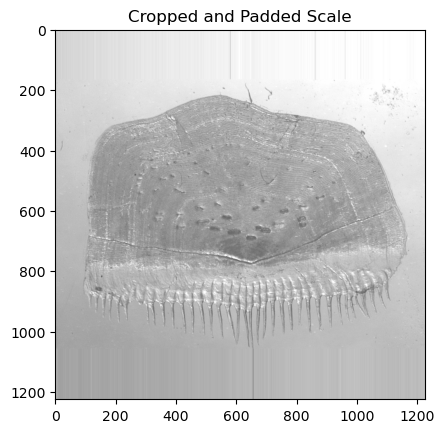

In [61]:
c_h, c_w, c = crop.shape
left, right, top, bottom = 0,0,0,0
if(c_h>c_w):
    difference = c_h-c_w
    left = int(difference/2)
    right = int(difference/2)
if(c_h<c_w):
    difference = c_w-c_h
    top = int(difference/2)
    bottom = int(difference/2)
crop_pad = cv.copyMakeBorder(crop, top, bottom, left, right, cv.BORDER_REPLICATE)
plt.imshow(crop_pad)
plt.title('Cropped and Padded Scale')
plt.show()